In [17]:
from matplotlib import pyplot as plt
import numpy as np

In [18]:
image = plt.imread("koala.jpg")
width = 1024
height = 768
images = [image]

In [25]:
def svd(img, k):
    ur, sr, vr = np.linalg.svd(img[:,:,0], full_matrices=False)
    ub, sb, vb = np.linalg.svd(img[:,:,1], full_matrices=False)
    ug, sg, vg = np.linalg.svd(img[:,:,2], full_matrices=False)
    argr = np.argsort(sr)[-k:]
    argb = np.argsort(sb)[-k:]
    argg = np.argsort(sg)[-k:]
    img0 = np.dot(ur[:, argr],np.dot(np.diag(sr[argr]), vr[argr, :]))
    img1 = np.dot(ub[:, argb],np.dot(np.diag(sb[argb]), vb[argb, :]))
    img2 = np.dot(ug[:, argg],np.dot(np.diag(sg[argg]), vg[argg, :]))
    img_ = np.stack([img0, img1, img2], axis=2)
    return img_.astype('uint8')

Forbenius Percentage: 100.0
Forbenius Percentage: 90.53133985858686
Forbenius Percentage: 93.18957676865661
Forbenius Percentage: 96.05810060705356
Forbenius Percentage: 98.902380379948
Forbenius Percentage: 90.53133985858686
Forbenius Percentage: 93.18957676865661
Forbenius Percentage: 96.05810060705356
Forbenius Percentage: 98.902380379948


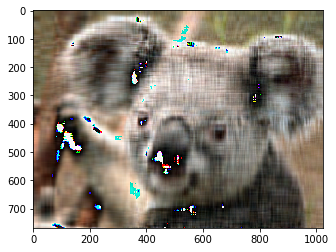

In [26]:
original_forb = np.linalg.norm(image)

images.append(svd(image, 1))
images.append(svd(image, 2))
images.append(svd(image, 4))
images.append(svd(image, 16))
for i in images:
    print("Forbenius Percentage:", 100*np.linalg.norm(i)/original_forb)

for i in images:
    plt.imshow(i)

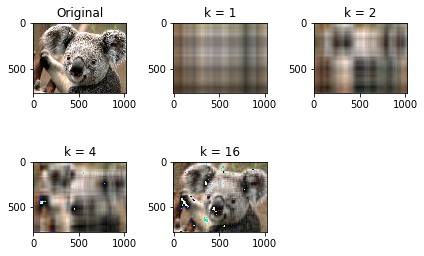

In [30]:
rows = 2
cols = 3
axes=[]
fig=plt.figure()

for a in range(5):
    axes.append( fig.add_subplot(rows, cols, a+1) )
    if a == 0:
        subplot_title=("Original")
    elif a == 4:
        subplot_title=(f"k = 16")
    else:
        subplot_title=(f"k = {2**(a-1)}")
    axes[-1].set_title(subplot_title)  
    plt.imshow(images[a])

fig.tight_layout()    
plt.show()